# Let's fill the cart!

# Step 1. Data Overview

Let's check the data files and make any necessary adjustments.


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# reading the datasets
df_instacart_orders = pd.read_csv("D:\Tripleten\Projects\Sprint-3-Data-manipulation\data\instacart_orders.csv", sep=';')
df_products = pd.read_csv("D:\Tripleten\Projects\Sprint-3-Data-manipulation\data\products.csv", sep=';')
df_aisles = pd.read_csv(r"D:\Tripleten\Projects\Sprint-3-Data-manipulation\data\aisles.csv", sep=';')
df_departments = pd.read_csv("D:\Tripleten\Projects\Sprint-3-Data-manipulation\data\departments.csv", sep=';')
df_order_products = pd.read_csv("D:\Tripleten\Projects\Sprint-3-Data-manipulation\data\order_products.csv", sep=';')

In [14]:
# instacart_orders
df_instacart_orders.info()
df_instacart_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [15]:
# products
df_products.info()
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [16]:
# aisles
df_aisles.info()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [17]:
# departments
df_departments.info()
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
# order_products
df_order_products.info()
df_order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


### Note

 We have some missing items.

# Step 2. Data Preparation

- Checking and correcting data types (e.g., make sure ID columns are integers)
- Identifying and filling in missing values
- Identifying and removing duplicate values

### DataFrame `instacart_orders`

In [ ]:
# Checking for duplicate orders
df_instacart_orders[df_instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Note

- We can see that we have duplicates on the 3rd, which is a Wednesday at 2 am.

In [ ]:
# Checking all orders placed at 2am on Wednesdays
df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Note
- indicates a probable bug in the system when computing the data

In [21]:
# Removing duplicate orders and rechecking the DataFrame
df_instacart_orders = df_instacart_orders.drop_duplicates()
df_instacart_orders[df_instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [22]:
# Rechecking only duplicate order IDs
print(df_instacart_orders[df_instacart_orders.duplicated('order_id')])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Note
- By eliminating duplicates we can continue with the analysis without any problems.

### DataFrame `products`

In [23]:
# Checking for completely duplicate rows
print(df_products[df_products.duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [24]:
# Checking only duplicate product IDs
print(df_products[df_products['product_id'].duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [25]:
# Checking only for duplicate product names and converting the names to lowercase for better comparison.
df_products['product_name'] = df_products['product_name'].str.lower()
df_products[df_products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [26]:
# Checking for duplicate product names that are not missing.
filter_name = df_products['product_name'].notna()
df_products[(filter_name) & (df_products['product_name'].duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


Note
- In this DataFrame we found several products without names. The correct thing to do would be to check with the person who provided the data before removing them.

### DataFrame `departments`

In [27]:
# Check for completely duplicate rows
df_departments[df_departments.duplicated()]

,department_id,department


In [28]:
# Only check for duplicate product IDs
df_departments[df_departments['department_id'].duplicated()]

,department_id,department


Note
- In this DataFrame we do not have duplicate data.

### DataFrame `aisles`

In [29]:
# Check for completely duplicate rows
df_aisles[df_aisles.duplicated()]

,aisle_id,aisle


In [30]:
# Only check for duplicate product IDs
df_aisles[df_aisles['aisle_id'].duplicated()]

,aisle_id,aisle


Note
- In this DataFrame we also did not find duplicate data.

### DataFrame `order_products`

In [31]:
# Check for completely duplicate rows
df_order_products[df_order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [32]:
# Double check for other complicated duplicate cases.

df_order_products[(df_order_products['order_id'].duplicated()) & (df_order_products['product_id'].duplicated())]

,order_id,product_id,add_to_cart_order,reordered
824,844425,39408,10.0,1
1303,2825714,44632,16.0,1
1723,2658937,15740,23.0,1
1837,1945917,19348,1.0,1
2013,1914624,46175,13.0,0
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


Note
- We don't have any duplicates here either.

## Searching for and Removing Missing Values

While processing duplicate values, we notice that we also have missing values ​​that we need to investigate in the following columns:

* The `'product_name'` column from the products table.
* The `'days_since_prior_order'` column from the orders table.
* The `'add_to_cart_order'` column from the order_products table.


### DataFrame `products`

In [33]:
# Finding missing values ​​in column 'product_name'
df_products[df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Note
- The unnamed products probably come from the addition of aisle number 100

In [34]:
# Are all missing product names associated with aisle ID 100?
aisle_100 = df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] == 100)]
aisle_100

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Note
- This corridor may have been added by mistake or may still be created.

In [35]:
# Are all missing product names associated with department ID 21?
df_products[(df_products['product_name'].isna()) & (df_products['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Note
- Perhaps this aisle was created in the system for a future addition as the product IDs are apparently different.

In [36]:
# Using the department and aisle tables to check the data for the aisle with ID 100 and the department with ID 21.
df_products[(df_products['aisle_id'] == 100) & (df_products['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Note
- Comparing all the columns we can see that this data does not actually exist.

In [27]:
# Filling missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

Note
- We have replaced the unnamed products with 'unknown' as we do not want to remove them.

### DataFrame `orders`

In [37]:
# Finding missing values
df_instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [38]:
# Are there missing values ​​for customers who are not placing their first order?
finding_nan = df_instacart_orders[(df_instacart_orders['order_number'] == 1) & (df_instacart_orders['days_since_prior_order'].isna())]
finding_nan.value_counts()

Series([], Name: count, dtype: int64)

Note
- We only have missing values ​​for people who place their first order.

### DataFrame `order_products`

In [39]:
# Searching for missing values
df_order_products.isna().sum()


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [40]:
# What are the minimum and maximum values ​​for this column?
min_and_max = df_order_products['add_to_cart_order'].min(), df_order_products['add_to_cart_order'].max()
min_and_max

(1.0, 64.0)

Note
- We found missing values ​​only in the add to cart order column.

In [41]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
id_missing_value = df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id']
id_missing_value


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [ ]:
# Filtering orders where 'add_to_cart_order' is 64
filter_itens = df_order_products[df_order_products['add_to_cart_order'] == 64]
filter_null = filter_itens['add_to_cart_order'].isna()
filter_null.count()

75

In [43]:
# Do all orders with missing values ​​contain more than 64 products?
# Group orders with missing data by order ID and counting the number of 'product_id' in each order and checking the minimum value of the count
group_id_add = df_order_products.groupby('add_to_cart_order')['order_id'].count()
group_id_add.min()

75

In [44]:
#Replace missing values ​​in column 'add_to_cart_order' with 999 and convert the column to integer type
df_order_products = df_order_products.fillna('999').astype(int)

# Conclusion

In this step we did a lot of things! The main thing was to investigate why the values ​​were missing and we found a problem with aisle id 100.

# Step 3. Data analysis

### Check if the values ​​in the 'order hour_of_day' and 'order_dow' column make sense

In [45]:
df_instacart_orders['order_hour_of_day'].min(), df_instacart_orders['order_hour_of_day'].max()

(0, 23)

In [46]:
df_instacart_orders['order_dow'].min(), df_instacart_orders['order_dow'].max()

(0, 6)

Note
- The time and days are correct.

### How many people make requests every hour of the day?

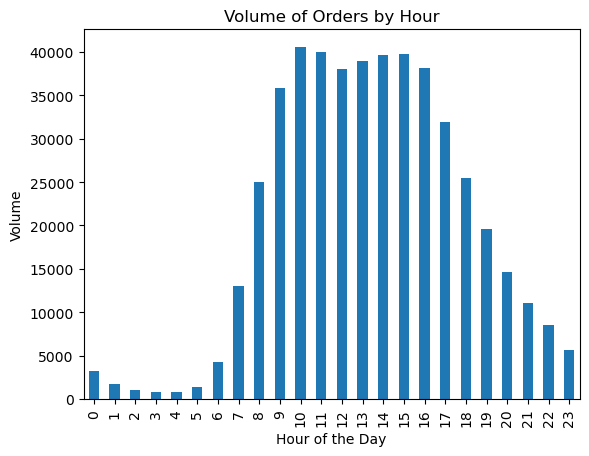

In [47]:
df_instacart_orders.groupby('order_hour_of_day')['user_id'].count().plot(kind='bar');
plt.title('Volume of Orders by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Volume');

Note
- The time when we receive the most orders is around lunchtime. Going to the supermarket when you're hungry is never a good idea!

### What day of the week do people shop?

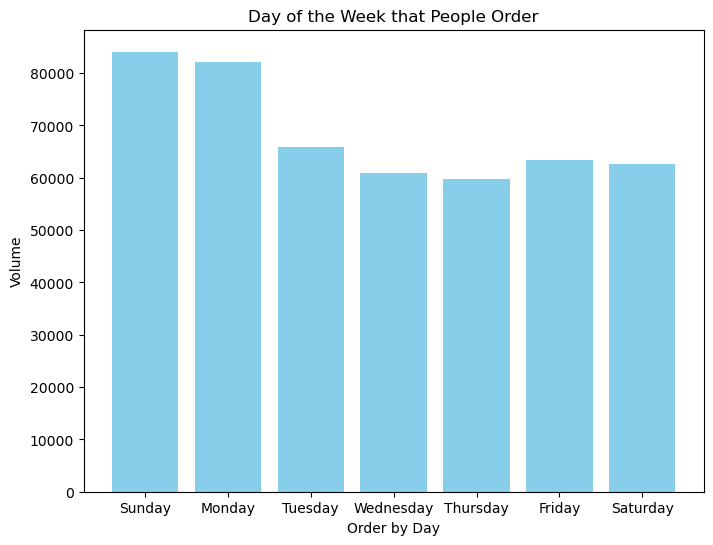

In [62]:
plot_data = df_instacart_orders.groupby('order_dow').user_id.count()
day_week = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
df_instacart_orders['day_week'] = df_instacart_orders['order_dow'].map(day_week)
orders_by_day = df_instacart_orders['day_week'].value_counts()
orders_by_day = orders_by_day.reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(orders_by_day.index, orders_by_day.values, color='skyblue')
ax.set_title('Day of the Week that People Order')
ax.set_xlabel('Order by Day')
ax.set_ylabel('Volume');

Note
- On Sundays people are usually off work and do more shopping, but we noticed that on Mondays too, being the second day that people do more shopping.

### How long do people wait before placing another order?


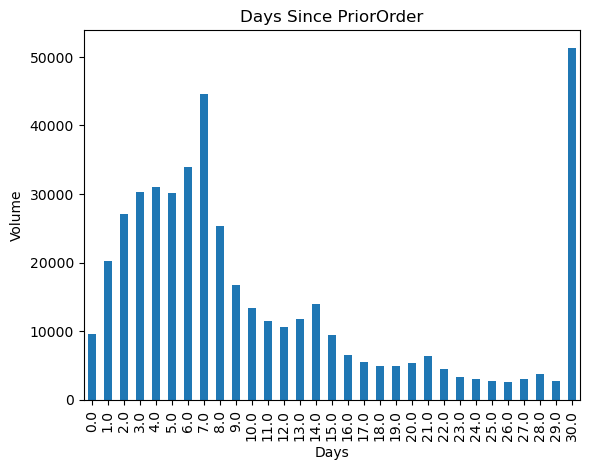

In [61]:
df_instacart_orders.groupby('days_since_prior_order')['user_id'].count().plot(kind='bar')
plt.title('Days Since PriorOrder')
plt.xlabel('Days')
plt.ylabel('Volume');

Note
- We can see that there are people who shop every week, while others wait an average of 30 days.

### Differences on Wednesdays and Saturdays in `'order_hour_of_day'`.

In [63]:
saturday = df_instacart_orders[df_instacart_orders['order_dow'] == 6]
wednesday = df_instacart_orders[df_instacart_orders['order_dow'] == 3]

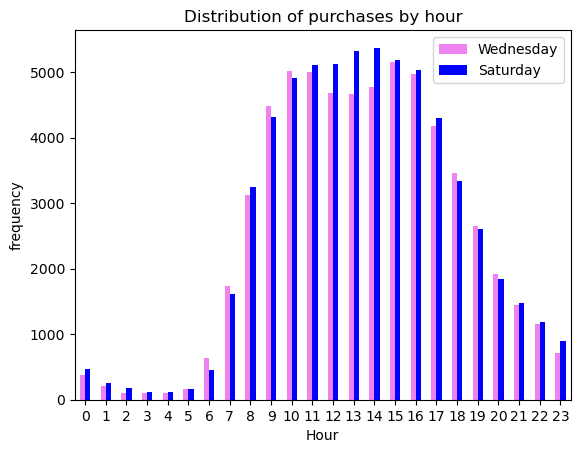

In [105]:
# Saturday and Wednesday frequency
freq_wednesday = wednesday['order_hour_of_day'].value_counts().sort_index()
freq_saturday = saturday['order_hour_of_day'].value_counts().sort_index()

# Creating a new DataFrame to plot the graph
df_by_hour = pd.DataFrame({'Wednesday': freq_wednesday, 'Saturday': freq_saturday})
df_by_hour

df_by_hour.plot(title='Distribution of purchases by hour',
                               xlabel='Hour',
                               ylabel='frequency',
                               rot=360,
                               kind='bar',
                               color= ['violet', 'blue'])

plt.legend(['Wednesday', 'Saturday'])
plt.show()

Note
- The differences are not significant.

### What is the distribution of the number of orders per customer?

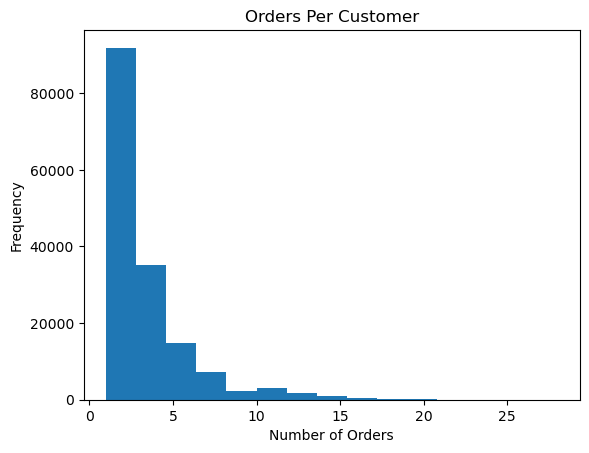

In [69]:
order_clients = df_instacart_orders.groupby('user_id')['order_number'].count().plot(kind='hist', bins=15)
plt.xlabel('Number of Orders')
plt.title('Orders Per Customer');

Note
- Most customers place 1 order.

### What are the top 20 most popular products? Display IDs and names.

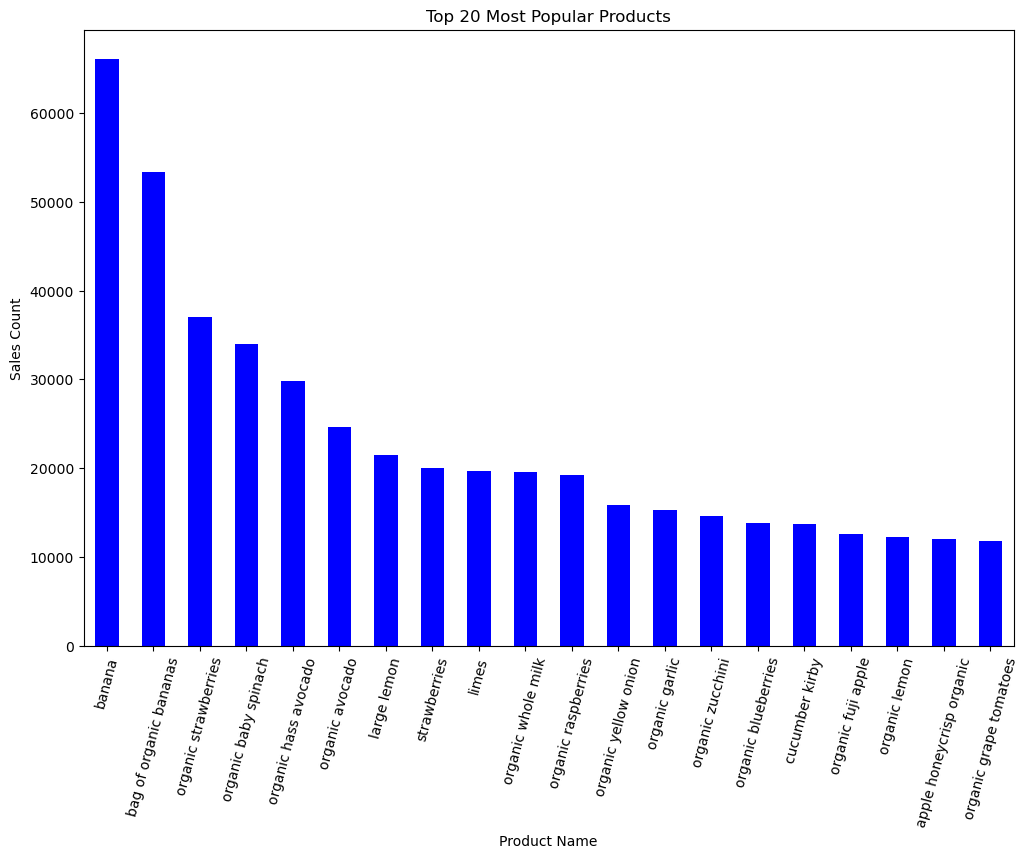

In [84]:
products = df_order_products.merge(df_products,
                                   left_on = 'product_id',
                                   right_on = 'product_id'
                                  )
popular = products['product_name'].value_counts().head(20)
popular_organized = popular.sort_values(ascending=False)

plt.subplots(figsize=(12, 8))
popular_organized.plot(kind='bar',
                       title='Top 20 Most Popular Products',
                               xlabel='Product Name',
                               ylabel='Sales Count',
                               rot=75,
                               color= 'blue');

Note
- Organic products are the best-selling products.

### How many items do people typically buy in one order? How is the distribution?

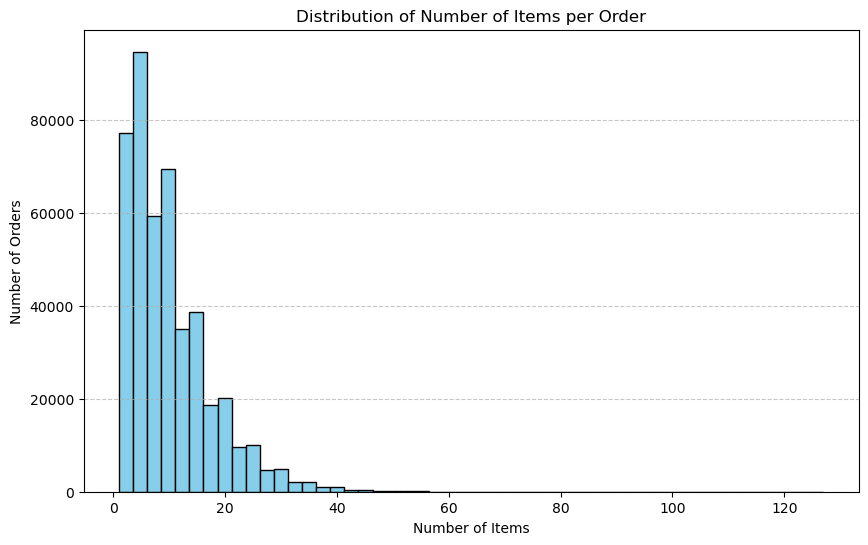

In [87]:
# Counting the number of items per order
items_per_order = df_order_products.groupby('order_id').size()

# histogram
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')

plt.grid(axis='y', linestyle='--', alpha=0.7)

Note
- Each person orders an average of 10 items per order.

### What are the top 20 items most frequently included in repeat orders? Display the IDs and names.

In [98]:
reordered = products[products['reordered'] == 1]
popular = reordered['product_name'].value_counts().reset_index().head(20)
popular_organized = popular.sort_values(by='count', ascending=False)
popular_organized

,product_name,count
0,banana,55763
1,bag of organic bananas,44450
2,organic strawberries,28639
3,organic baby spinach,26233
4,organic hass avocado,23629
5,organic avocado,18743
6,organic whole milk,16251
7,large lemon,15044
8,organic raspberries,14748
9,strawberries,13945


Note
- Organic products continue to be the most popular.

### For each product, what proportion of all orders for it are repeat orders?

In [101]:
# Counting the total number of orders for each product
total_orders_per_product = df_order_products['product_id'].value_counts()

# Counting the number of repeat orders for each product
repeat_orders_by_product = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts()

# Calculating the proportion of repeat orders for each product
proportion = repeat_orders_by_product / total_orders_per_product

# Create a DataFrame with the product ID and name columns and the proportion of repeat orders
repeated_proportion_table = pd.DataFrame({
    'product_name': df_products.set_index('product_id').loc[proportion.index, 'product_name'],
    'proportion_repeated': proportion.values
})

repeated_proportion_table


,product_name,proportion_repeated
product_id,,
1,chocolate sandwich cookies,0.564286
2,all-seasons salt,NaN
3,robust golden unsweetened oolong tea,0.738095
4,smart ones classic favorites mini rigatoni wit...,0.510204
7,pure coconut water with orange,0.500000
...,...,...
49690,high performance energy drink,0.800000
49691,original pancake & waffle mix,0.430556
49692,organic instant oatmeal light maple brown sugar,0.416667


### For each customer, what proportion of all their orders are repeat?

In [102]:
# Counting the total number of orders for each customer
total_orders_per_customer = df_instacart_orders['user_id'].value_counts()

# Counting the number of repeat orders for each customer
repeat_orders_by_customer = df_order_products[df_order_products['reordered'] == 1]['order_id'].value_counts()

# Calculating the proportion of repeat orders for each customer
proportion = repeat_orders_by_customer / total_orders_per_customer

# Creating a table with customer ID columns and repeat order ratio
table_proportion_repeated_customer = pd.DataFrame({
    'user_id': proportion.index,
    'proporcao_repetidos': proportion.values
})

table_proportion_repeated_customer

,user_id,proporcao_repetidos
0,2,NaN
1,4,6.0
2,5,NaN
3,6,NaN
4,7,NaN
...,...,...
535073,3421013,NaN
535074,3421018,NaN
535075,3421034,NaN
535076,3421053,NaN


### What are the top 20 items that people put in their carts before all other items?

In [103]:
organaizing = products.groupby('add_to_cart_order')['product_name'].value_counts().reset_index().head(20)
organaizing

,add_to_cart_order,product_name,count
0,1,banana,15562
1,1,bag of organic bananas,11026
2,1,organic whole milk,4363
3,1,organic strawberries,3946
4,1,organic hass avocado,3390
5,1,organic baby spinach,3336
6,1,organic avocado,3044
7,1,spring water,2336
8,1,strawberries,2308
9,1,organic raspberries,2024


Note
- These are usually fruits and vegetables, especially organic ones.

# Final Conclusion

After the analysis, we can conclude that people prefer to do their shopping on Sundays and Mondays. Their preferences are organic products. We also found an aisle where the company will possibly add products in the future.